## Project 3: Behavior Cloning - Udacity Self Driving Cars

In [2]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
drivingLog = pd.read_csv('./Dataset/train/driving_log.csv',names=['Center','Left','Right','Steering Angle','Throttle','Break','Speed'],header=None)

In [3]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
drivingLogTest = pd.read_csv('./Dataset/test/driving_log.csv',names=['Center','Left','Right','Steering Angle','Throttle','Break','Speed'],header=None)

In [3]:
#print(drivingLog) # 13707 x 7

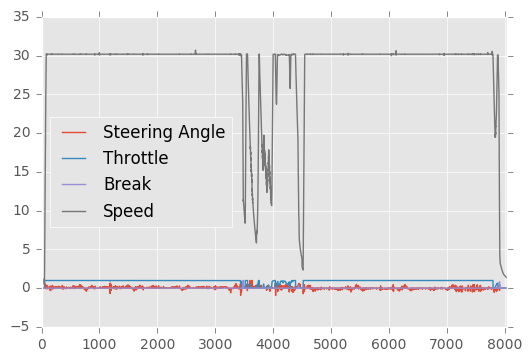

In [4]:
plt.figure(figsize=(20,10));
drivingLog.plot();

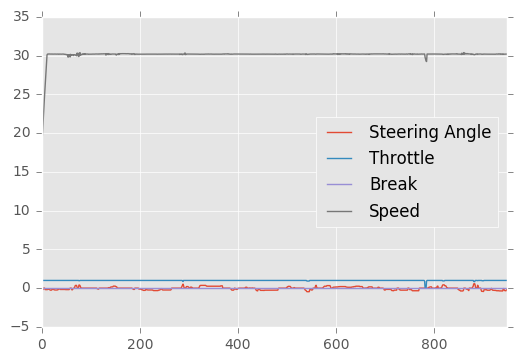

In [5]:
plt.figure(figsize=(20,10));
drivingLogTest.plot();

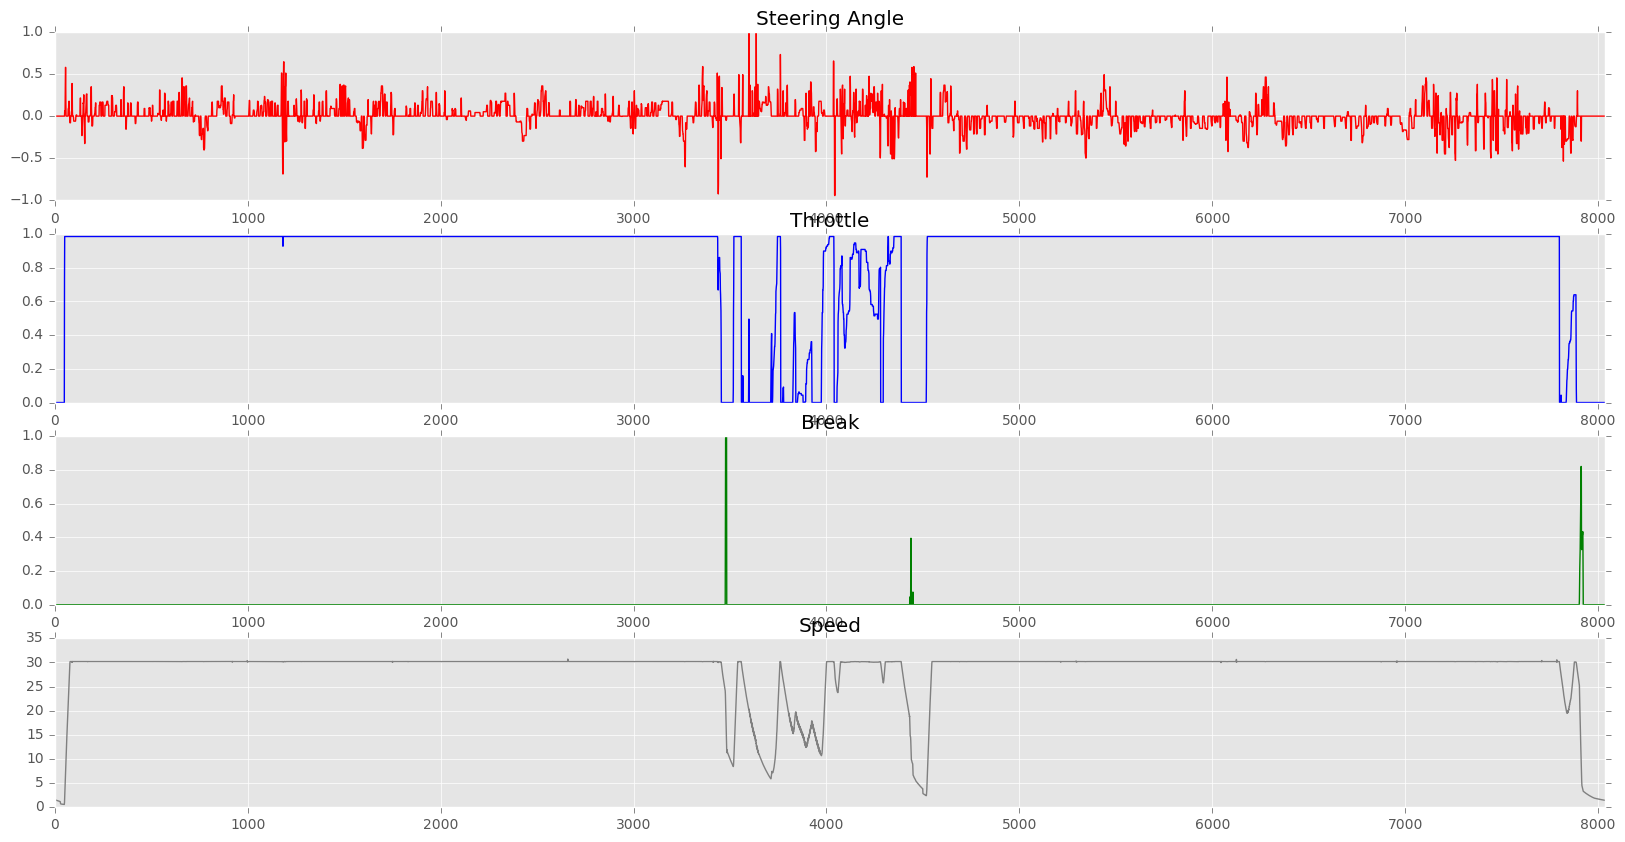

In [6]:
# source: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(20,10))
drivingLog['Steering Angle'].plot(ax=axes[0],color='red'); axes[0].set_title('Steering Angle');
drivingLog['Throttle'].plot(ax=axes[1],color='blue'); axes[1].set_title('Throttle');
drivingLog['Break'].plot(ax=axes[2],color='green'); axes[2].set_title('Break');
drivingLog['Speed'].plot(ax=axes[3],color='gray'); axes[3].set_title('Speed');

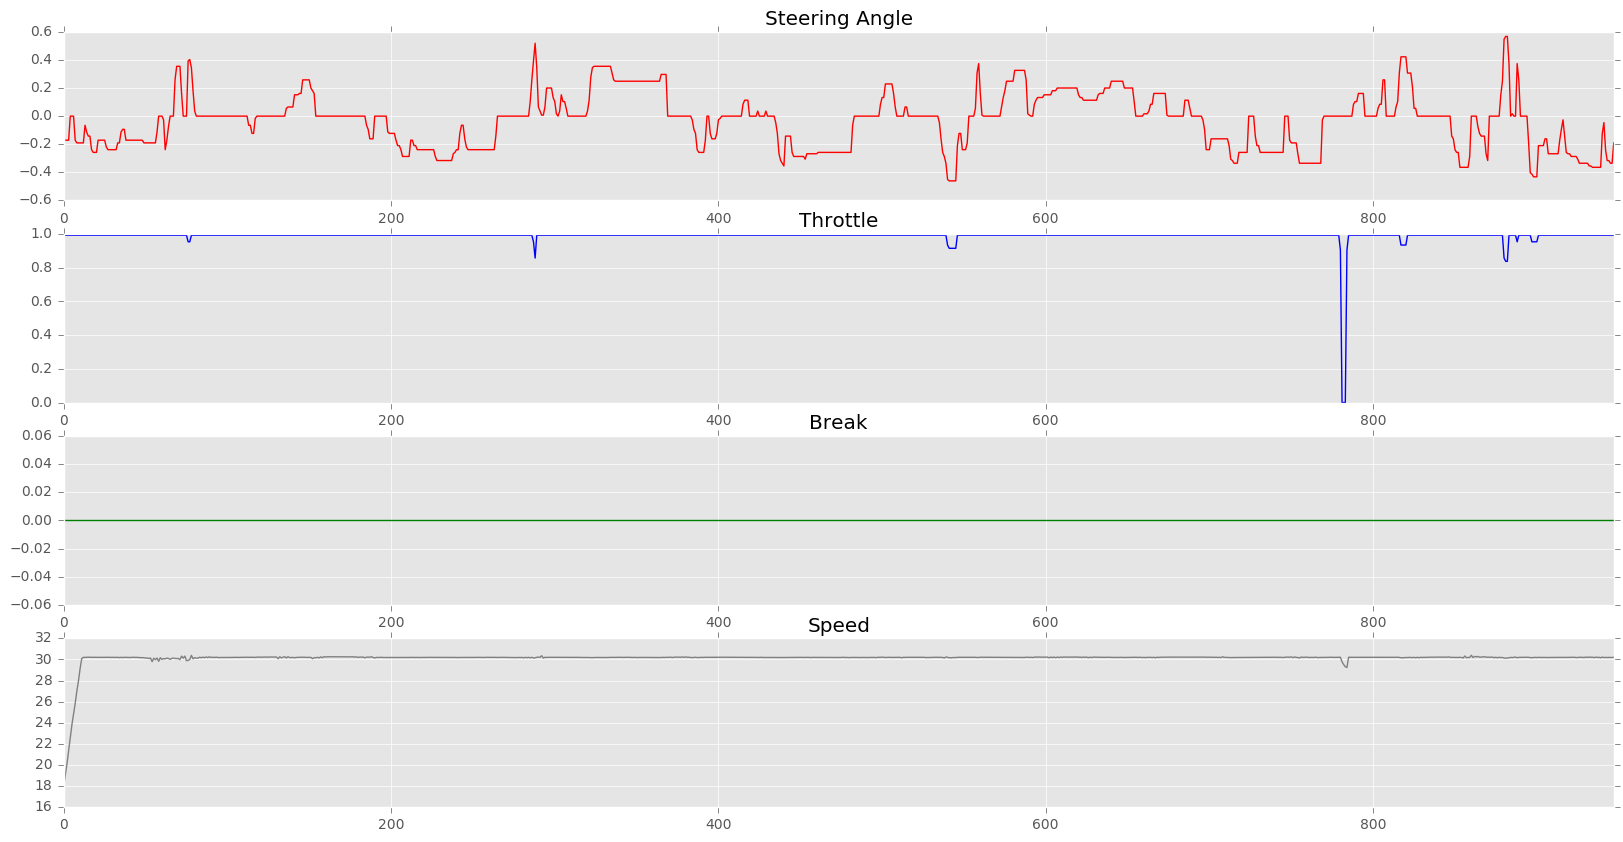

In [7]:
# source: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(20,10))
drivingLogTest['Steering Angle'].plot(ax=axes[0],color='red'); axes[0].set_title('Steering Angle');
drivingLogTest['Throttle'].plot(ax=axes[1],color='blue'); axes[1].set_title('Throttle');
drivingLogTest['Break'].plot(ax=axes[2],color='green'); axes[2].set_title('Break');
drivingLogTest['Speed'].plot(ax=axes[3],color='gray'); axes[3].set_title('Speed');

In [4]:
# load images
import cv2
import numpy as np
def loadImg(imgLoc,trainFlag):
    if trainFlag:
        imageLocation = './Dataset/train/'+imgLoc
        image = cv2.imread(imageLocation,cv2.IMREAD_COLOR) # BGR
    else:
        imageLocation = './Dataset/test/'+imgLoc
        image = cv2.imread(imageLocation,cv2.IMREAD_COLOR) 
    if (image is None):
        print(imageLocation)
    
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2YUV) # RGB
    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
    #image[:,:,0] = clahe.apply(image[:,:,0].astype(np.uint8))
    #image = cv2.cvtColor(image,cv2.COLOR_YUV2RGB)
    #image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #image = image[50:160,:] # preprocessing
    image = image[60:-20,:,:] # vivek approach
    image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    #image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
    #image = cv2.resize(image,(32,32), interpolation=cv2.INTER_AREA)
    #image = image.reshape(image.shape[0],image.shape[1],1)
    #image = image / 255. - 0.5 # normalize between -0.5 and 0.5
    #image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
numSample = 50
centerImgs = np.array([loadImg(imgLoc, True) for imgLoc in drivingLog['Center'][0:numSample]], dtype=np.float32)
leftImgs = np.array([loadImg(imgLoc, True) for imgLoc in drivingLog['Left'][0:numSample]], dtype=np.float32)
rightImgs = np.array([loadImg(imgLoc, True) for imgLoc in drivingLog['Right'][0:numSample]], dtype=np.float32)   

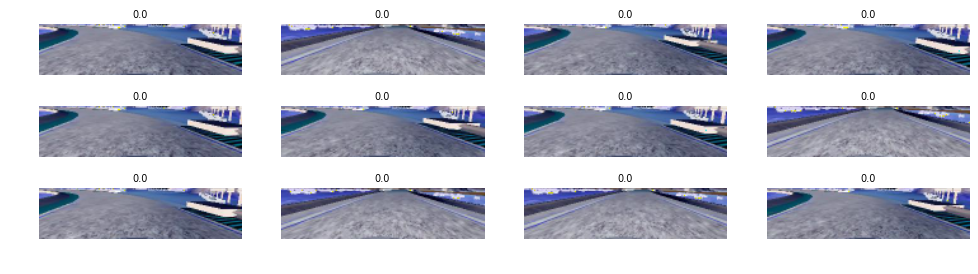

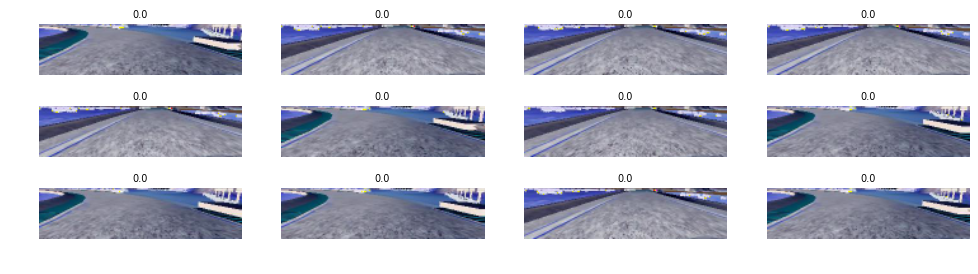

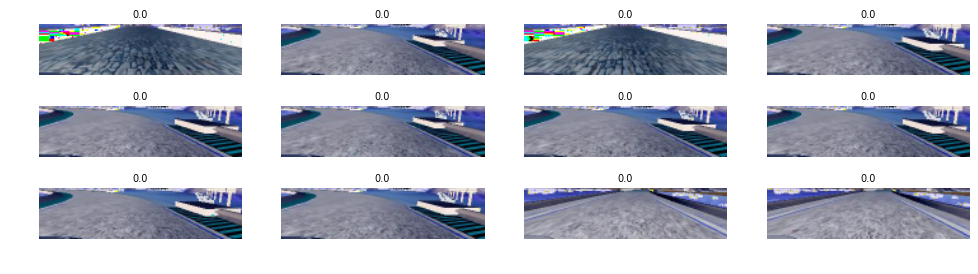

In [8]:
def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], grayFlag=False, thr=0.0):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=(12,3))
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        imgID = np.random.randint(nLimit-1)
        image = data[imgID]
        #image = image[60:150,:]
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image+thr)
        img.set_title(labels[imgID],fontsize=7)
        plt.axis('off')
plotSpecialTool(centerImgs,drivingLog['Steering Angle'],factors=[3,4],thr=0.0,grayFlag=False) 
plotSpecialTool(leftImgs,drivingLog['Steering Angle'],factors=[3,4],thr=0.0,grayFlag=False) 
plotSpecialTool(rightImgs,drivingLog['Steering Angle'],factors=[3,4],thr=0.0,grayFlag=False) 

In [5]:
print(centerImgs.shape)
print(leftImgs.shape)
print(rightImgs.shape)

(50, 128, 128, 3)
(50, 128, 128, 3)
(50, 128, 128, 3)


In [6]:
# data selection
# main idea: https://github.com/budmitr # Dmitrii Budylskii
nonZeroSamples =  drivingLog.loc[drivingLog['Steering Angle'] != 0.0,:] 
zeroSamples =  drivingLog.loc[drivingLog['Steering Angle'] == 0.0,:]  # 
#print(nonZeroSamples)
print(drivingLog.shape, nonZeroSamples.shape, zeroSamples.shape) 

(8036, 7) (3675, 7) (4361, 7)


In [7]:
fractionVar = 0.25
newDrivingLog = pd.concat([nonZeroSamples, zeroSamples.sample(frac=fractionVar)], ignore_index=True)

In [8]:
#print(newDrivingLog)
drivingLog = newDrivingLog

In [9]:
print(drivingLog['Steering Angle'].shape)

(4765,)


In [10]:
# Generator
def generateBatch(data, labels, batchSize=10, threshold=0.2):
    keepProbability = 0.0
    startIdx = 0
    batchCount = len(labels)/batchSize 
    thermal = 0.0
    inputShape = loadImg(data['Center'][0], True) 
    batchXCenter = np.zeros((batchSize, inputShape.shape[0], inputShape.shape[1], inputShape.shape[2]))
    batchY = np.zeros(batchSize)
    while True: # to make sure we never reach the end
        #if startIdx > len(data):
        #    startIdx = 0
        #endIdx = startIdx + batchSize
        #batchXCenter = np.array([loadImg(imgLoc) for imgLoc in data['Center'][startIdx:endIdx]], dtype=np.float32)
        #batchXLeft = np.array([loadImg(imgLoc) for imgLoc in data['Left'][startIdx:endIdx]], dtype=np.float32)
        #batchXRight = np.array([loadImg(imgLoc) for imgLoc in data['Right'][startIdx:endIdx]], dtype=np.float32) 
        #yield batchXCenter, batchXLeft, batchXRight, labels[startIdx:endIdx], startIdx
        #for i in range(startIdx,endIdx):
        counter = 0
        while counter<=batchSize-1:
            idx = np.random.randint(len(labels)-1) 
            steeringAngle = labels[idx]
            #if abs(steeringAngle) < threshold: # small angle
                # check probabilWity of being or not being :d
                #if np.random.rand() > 0.5: #(0.02*thermal): #thermal: # keepProbability
                    #continue
            imgLoc = data['Center'][idx]
            image = loadImg(imgLoc, True) 

            # randomly augment data
            if np.random.rand() > 0.5: # 50 percent chance to see the right angle
                image = cv2.flip(image,1)
                steeringAngle = -steeringAngle
            #if np.random.rand() > 0.5: # 50 percent chance to augment data
                #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                #image = clahe.apply(image.astype('uint8'))
            '''if np.random.rand() > 0.25: # 25 percent chance to augment data
                # use left and right images
                if np.random.rand() > 0.5: # use left image instead of right image
                    imgLoc = data['Left'][idx]
                    image = loadImg(imgLoc, True) 
                    rows,cols,_ = image.shape
                    transMat = np.float32([[1,0,-15],[0,1,0]])
                    image = cv2.warpAffine(image,transMat,(cols,rows))               
                else: # use right image
                    imgLoc = data['Right'][idx]
                    image = loadImg(imgLoc, True)
                    rows,cols,_ = image.shape
                    transMat = np.float32([[1,0,5],[0,1,0]])
                    image = cv2.warpAffine(image,transMat,(cols,rows))  '''
            rows, cols, _ = image.shape
            transRange = 100
            numPixels = 10
            valPixels = 0.4
            transX = transRange * np.random.uniform() - transRange/2
            steeringAngle = steeringAngle + transX/transRange * 2 * valPixels
            transY = numPixels * np.random.uniform() - numPixels/2
            transMat = np.float32([[1,0, transX], [0,1, transY]])
            image = cv2.warpAffine(image, transMat, (cols, rows))
                
            if np.random.rand() <= 1.0: # always # augment image's light and brightnesss
                # http://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv
                hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) #convert it to hsv
                randomLight = 0.25 + np.random.rand() 
                hsv[:,:,2] =  hsv[:,:,2] * randomLight
                newImage = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
                
            # sanity check of data
            image = image.reshape(inputShape.shape[0], inputShape.shape[1], inputShape.shape[2])
            if(image.shape[0]==0):
                print(idx)
                continue
            
            batchXCenter[counter] = image
            batchY[counter] = steeringAngle
            counter += 1
        yield batchXCenter, batchY
        thermal += 1/batchCount
    
def generateBatchVal(data, labels, batchSize=10):
    startIdx = 0
    batchCount = len(labels)/batchSize 
    while True: # to make sure we never reach the end
        endIdx = startIdx + batchSize
        batchXCenter = np.array([loadImg(imgLoc, False) for imgLoc in data['Center'][startIdx:endIdx]], dtype=np.float32)
        #batchXLeft = np.array([loadImg(imgLoc) for imgLoc in data['Left'][startIdx:endIdx]], dtype=np.float32)
        #batchXRight = np.array([loadImg(imgLoc) for imgLoc in data['Right'][startIdx:endIdx]], dtype=np.float32) 
        #yield batchXCenter, batchXLeft, batchXRight, labels[startIdx:endIdx], startIdx
        batchY = labels[startIdx:endIdx]
        yield batchXCenter, batchY
        startIdx = endIdx
        if startIdx > len(data)-1:
            startIdx = 0            

In [11]:
# example - a test case
miniBatch = generateBatch(drivingLog, drivingLog['Steering Angle'], batchSize=10, threshold = 0.001)

In [12]:
steeringAngleList = np.empty((0))
#print(steeringAngleList)
for i in range(1,200):
    steeringAngleList = np.append(steeringAngleList,next(miniBatch)[1])
    #if i>5:
    #    print(next(miniBatch)[1])
    #else:
    #    next(miniBatch)
# print(next(miniBatch)[4])

In [13]:
print(np.sum(np.array([   2.,    0.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    3.,
           2.,    1.,    1.,    3.,    0.,    6.,   14.,   12.,   10.,
          22.,   13.,   26.,   12.,   30.,   68.,   20.,   68.,   82.,
          84.,   36.,   67.,   75.,   81.,  319.,  232.,  135.,  157.,
         234.,  318.,  356.,  128.,  161.,  573.,  110.,  339.,  350.,
         228.,  156.,  170.,  253.,  312.,   68.,   73.,   70.,   55.,
          88.,   79.,   41.,   22.,   61.,   39.,   18.,   25.,   16.,
          20.,    7.,    9.,    8.,    3.,    0.,    1.,    0.,    0.,
           2.,    2.,    0.,    0.,    0.,    2.,    0.,    4.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    1.])))

5990.0


(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   2.,   1.,   5.,
          1.,   2.,   5.,   2.,   4.,   6.,   9.,   7.,  11.,  12.,  10.,
         15.,  23.,  19.,  31.,  33.,  29.,  37.,  41.,  39.,  37.,  43.,
         44.,  43.,  48.,  40.,  35.,  49.,  34.,  52.,  63.,  61.,  41.,
         36.,  50.,  49.,  44.,  42.,  43.,  58.,  33.,  58.,  52.,  42.,
         40.,  50.,  35.,  38.,  32.,  38.,  33.,  32.,  39.,  29.,  33.,
         21.,  13.,  21.,  24.,   7.,   9.,  11.,   5.,   7.,   5.,   4.,
          3.,   3.,   4.,   2.,   1.,   0.,   0.,   1.,   2.,   0.,   1.,
          1.]),
 array([-1.11409758, -1.09430026, -1.07450295, -1.05470563, -1.03490831,
        -1.015111  , -0.99531368, -0.97551636, -0.95571905, -0.93592173,
        -0.91612442, -0.8963271 , -0.87652978, -0.85673247, -0.83693515,
        -0.81713783, -0.79734052, -0.7775432 , -0.75774589, -0.73794857,
        -0.71815125, -0.69

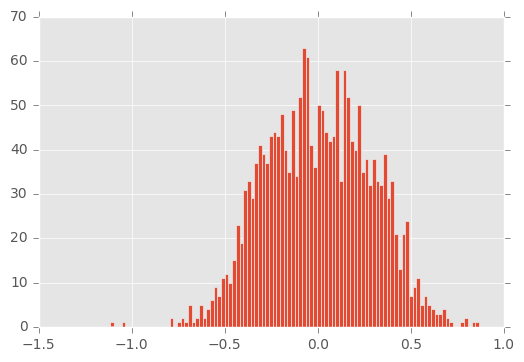

In [14]:
#hist = np.histog\ram(steeringAngleList)
plt.hist(steeringAngleList.astype('float'), bins=100)

In [9]:
#drivingLog = drivingLog.drop('level_0', 1)
print(drivingLog.columns.values)

['Center' 'Left' 'Right' 'Steering Angle' 'Throttle' 'Break' 'Speed']


In [16]:
XTrain = drivingLog
yTrain = drivingLog['Steering Angle']
XVal = drivingLogTest
yVal = drivingLogTest['Steering Angle']

In [17]:
print(XVal.shape)

(948, 7)


0.1670138
0.270891034378


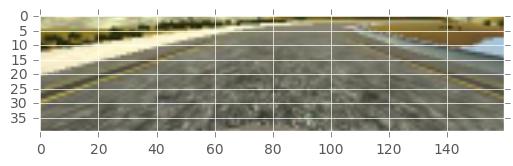

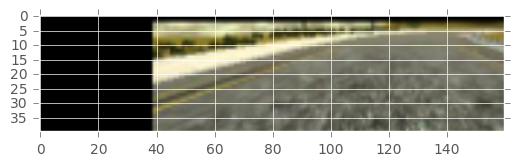

In [20]:
# augment data to a dilstribution same to normal distribution
# main idea: Vivek Yadav (https://github.com/vxy10/) 
idx = 100
test = XTrain['Center'][idx]
steeringAngle = yTrain[idx]
image = loadImg(test, True) 
plt.figure()
if image.shape[2]<3:
    plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(image)
print(steeringAngle)

rows, cols, _ = image.shape
transRange = 150
numPixels = 10
valPixels = 0.2
transX = transRange * np.random.uniform() - transRange/2
newsteeringAngle = steeringAngle + transX/transRange * 2 * valPixels
transY = numPixels * np.random.uniform() - numPixels/2
transMat = np.float32([[1,0, transX], [0,1, transY]])
newImage = cv2.warpAffine(image, transMat, (cols, rows))

#img = img[60:-20,:,:]
#newImage = cv2.resize(newImage, (64, 64), interpolation=cv2.INTER_AREA)
    
rows,cols,dim3 = newImage.shape
plt.figure()
if dim3<3:
    plt.imshow(newImage.reshape(newImage.shape[0],newImage.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(newImage)
print(newsteeringAngle)          
            

0.0
1.159008294823272
0.0


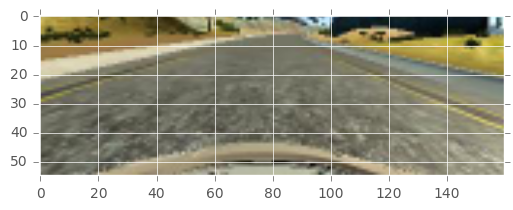

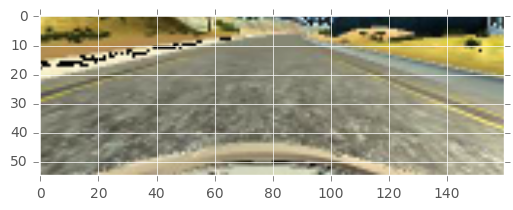

In [130]:
# augment light and brightness
idx = 2000
test = XTrain['Center'][idx]
testLabel = yTrain[idx]
image = loadImg(test, True) 
#image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.figure()
if image.shape[2]<3:
    plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(image)
print(testLabel)

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) #convert it to hsv
#h, s, v = cv2.split(hsv)
randomLight = 0.25 + np.random.rand() 
print(randomLight)
hsv[:,:,2] =  hsv[:,:,2] * randomLight
newImage = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) 
rows,cols,dim3 = newImage.shape
plt.figure()
if dim3<3:
    plt.imshow(newImage.reshape(newImage.shape[0],newImage.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(newImage)
print(testLabel)

0.0
0.0
0.0


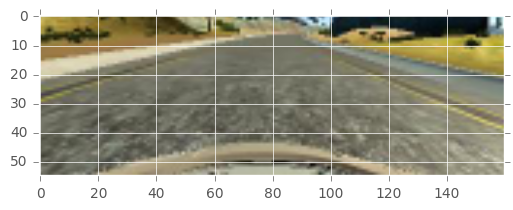

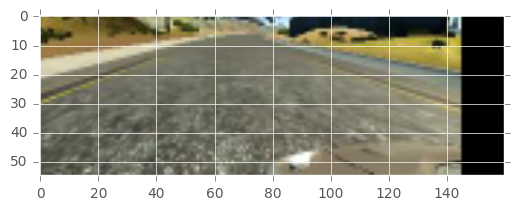

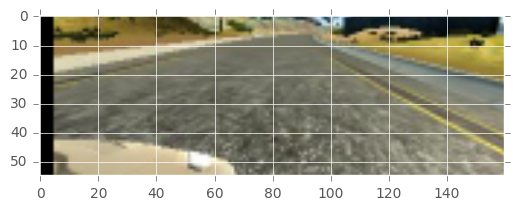

In [27]:
## test left and right augmentation
# augment test
idx = 2000
test = XTrain['Center'][idx]
testLabel = yTrain[idx]
image = loadImg(test, True) 
plt.figure()
if image.shape[2]<3:
    plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(image)
print(testLabel)

newImage = XTrain['Left'][idx]
newImage = loadImg(newImage, True) 
rows,cols,dim3 = newImage.shape
transMat = np.float32([[1,0,-15],[0,1,0]])
newImage = cv2.warpAffine(newImage,transMat,(cols,rows))
plt.figure()
if dim3<3:
    plt.imshow(newImage.reshape(newImage.shape[0],newImage.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(newImage)
print(testLabel)

#test right
newImage = XTrain['Right'][idx]
newImage = loadImg(newImage, True) 
rows,cols,dim3 = newImage.shape
transMat = np.float32([[1,0,5],[0,1,0]])
newImage = cv2.warpAffine(newImage,transMat,(cols,rows))
plt.figure()
if dim3<3:
    plt.imshow(newImage.reshape(newImage.shape[0],newImage.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(newImage)
print(testLabel)

In [28]:
miniBatch = generateBatch(XTrain, yTrain, batchSize=10)

0.1765823
(40, 160, 3)
-0.1765823


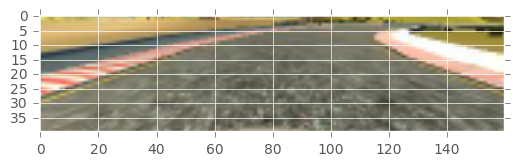

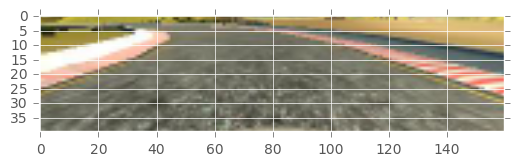

In [25]:
# augment test
idx = 1000
test = XTrain['Center'][idx]
testLabel = yTrain[idx]
image = loadImg(test, True) 
plt.figure()
if image.shape[2]<3:
    plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(image)
print(testLabel)

newImage = cv2.flip(image,1)
plt.figure()
plt.imshow(newImage)
print(image.shape)
print(-testLabel)

In [26]:
# model design
import pickle
import numpy as np
import math
from keras.utils import np_utils
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout, Dense, Activation
from keras.optimizers import SGD, Adam
from keras.models import Sequential

# config
#inputShape = (110,320,3) 
#inputShape = (55,160,3) # centerImgs.shape # half for cpu
#inputShape = (128,128,3) # centerImgs.shape # half for cpu
inputShape = (40,160,3)

# my architecture 
model = Sequential()
model.add(Lambda(lambda x: x/255.-0.5,input_shape=inputShape))
model.add(Conv2D(3,1,1, activation = 'elu', name='Conv2D1')) # color space 

model.add(Conv2D(16,8,8, activation = 'elu', name='Conv2D2'))
#model.add(Conv2D(16,9,9, activation = 'elu', name='Conv2D2'))
model.add(MaxPooling2D(pool_size=(2,2), name='MaxPoolC2'))
model.add(Dropout(0.3, name='DropoutC2'))

model.add(Conv2D(32,5,5, activation = 'elu', name='Conv2D3'))
#model.add(Conv2D(32,7,7, activation = 'elu', name='Conv2D3'))
model.add(MaxPooling2D(pool_size=(2,2), name='MaxPoolC3'))
model.add(Dropout(0.3, name='DropoutC3'))

model.add(Conv2D(32,3,3, activation = 'elu', name='Conv2D4'))
#model.add(Conv2D(128,3,3, activation = 'elu', name='Conv2D5'))
model.add(MaxPooling2D(pool_size=(2,2), name='MaxPoolC4'))
model.add(Dropout(0.3, name='DropoutC4'))

#model.add(Conv2D(64,3,3, activation = 'elu', name='Conv2D5'))
#model.add(Conv2D(128,3,3, activation = 'elu', name='Conv2D6'))
#model.add(MaxPooling2D(pool_size=(2,2), name='MaxPoolC6'))
#model.add(Dropout(0.5, name='DropoutC6'))

#model.add(Conv2D(256,2,2, activation = 'relu', name='Conv2D7'))
#model.add(MaxPooling2D(pool_size=(2,2), name='MaxPoolC7'))
#model.add(Dropout(0.5, name='DropoutC7'))

# convolution to dense
model.add(Flatten(name='Conv2Dense'))

model.add(Dense(256,activation='elu', name='Dense1'))
model.add(Dropout(0.5, name='DropoutD1'))

model.add(Dense(128,activation='elu', name='Dense2'))
model.add(Dropout(0.5, name='DropoutD2'))

model.add(Dense(64,activation='elu', name='Dense3'))
model.add(Dropout(0.5, name='DropoutD3'))

model.add(Dense(8,activation='elu', name='Dense4'))
model.add(Dropout(0.5, name='DropoutD4'))

model.add(Dense(1,activation='elu', name='Output')) # problem is a regression

In [27]:
# model summary 
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 40, 160, 3)    0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
Conv2D1 (Convolution2D)          (None, 40, 160, 3)    12          lambda_2[0][0]                   
____________________________________________________________________________________________________
Conv2D2 (Convolution2D)          (None, 33, 153, 16)   3088        Conv2D1[0][0]                    
____________________________________________________________________________________________________
MaxPoolC2 (MaxPooling2D)         (None, 16, 76, 16)    0           Conv2D2[0][0]                    
___________________________________________________________________________________________

In [28]:
#adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer="adam", loss="mse")
#model.compile(optimizer=adam,
#          loss='mse')

In [29]:
#trainGenerator = generateBatch(XTrain, yTrain, batchSize=10, threshold=0.15)
#validGenerator = generateBatchVal(XVal, yVal, batchSize=10)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LambdaCallback, Callback

numTimes = 10
numEpoch = 10 # 4 + 2

#history = model.fit_generator(trainGenerator, samplesPerEpoch, numEpoch, 
#                    verbose=2, validation_data=validGenerator, nb_val_samples = nbValSamples)  
#history = model.fit_generator(trainGenerator, samplesPerEpoch, numEpoch, verbose=1) 
# Epoch 1/1
# 2630/17390 [===>..........................] - ETA: 63s - loss: 0.1405 - mean_squared_logarithmic_error: 0.0367

thr = 0.0001 # 0.3
for time in range(numTimes):
    trainGenerator = generateBatch(XTrain, yTrain, batchSize=50, threshold=thr)
    validGenerator = generateBatchVal(XVal, yVal, batchSize=50)
    samplesPerEpoch = 32000 # len(yTrain)
    nbValSamples = 1000
    #history = model.fit_generator(trainGenerator, samplesPerEpoch, numEpoch, verbose=1)
    #history = model.fit_generator(trainGenerator, samplesPerEpoch, numEpoch, 
    #                verbose=1, validation_data=validGenerator, nb_val_samples = nbValSamples,
     #               callbacks=[ModelCheckpoint(filepath="bestVal.h5", verbose=1, save_best_only=True), ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.000001)])
    history = model.fit_generator(trainGenerator, samples_per_epoch=samplesPerEpoch, nb_epoch=numEpoch, validation_data=validGenerator,
                    nb_val_samples=nbValSamples, callbacks=[ModelCheckpoint(filepath="bestVal"+str(time)+".h5", verbose=1, save_best_only=True)]
                )
    print(thr, 'Time ',time+1)
    thr += (1/(numTimes))

Epoch 1/10
20000/20000 [==============================] - 63s - loss: 0.0433 - val_loss: 0.0228
Epoch 2/10
20000/20000 [==============================] - 59s - loss: 0.0332 - val_loss: 0.0307
Epoch 3/10
20000/20000 [==============================] - 59s - loss: 0.0322 - val_loss: 0.0303
Epoch 4/10
20000/20000 [==============================] - 59s - loss: 0.0306 - val_loss: 0.0288
Epoch 5/10
20000/20000 [==============================] - 59s - loss: 0.0278 - val_loss: 0.0248
Epoch 6/10
20000/20000 [==============================] - 59s - loss: 0.0284 - val_loss: 0.0276
Epoch 7/10
20000/20000 [==============================] - 59s - loss: 0.0278 - val_loss: 0.0215
Epoch 8/10
20000/20000 [==============================] - 59s - loss: 0.0273 - val_loss: 0.0243
Epoch 9/10
20000/20000 [==============================] - 59s - loss: 0.0272 - val_loss: 0.0170
Epoch 10/10
20000/20000 [==============================] - 59s - loss: 0.0266 - val_loss: 0.0182
0.0001 Time  1
Epoch 1/10
20000/20000 [

In [30]:
# load best weghts
model.load_weights('bestVal9.h5')

-0.2389614
1/1 [==============================] - 0s
[[-0.14795035]]


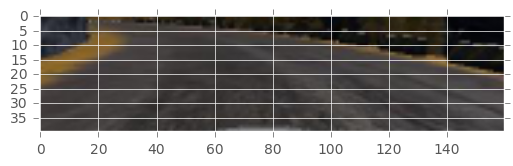

In [32]:
#  test model
idx = 250 # 148
# 865  2500  13675 1500 7000 7100
# 250 5806 15975
#drivingLog,drivingLog['Steering Angle']
test = drivingLogTest['Center'][idx]
testLabel = drivingLogTest['Steering Angle'][idx]
image = loadImg(test, False) 
plt.figure()
if image.shape[2]<3:
    plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
else:
    plt.imshow(image)
print(testLabel)

newTestLabel = model.predict(image.reshape(1,40,160,image.shape[2]), batch_size=1, verbose=1)
#newTestLabel = model.predict(image.reshape(1,128,128,image.shape[2]), batch_size=1, verbose=1)
#newTestLabel = model.predict(image.reshape(1,32,32,image.shape[2]), batch_size=1, verbose=1)
#newTestLabel = model.predict(image.reshape(1,110,320,image.shape[2]), batch_size=1, verbose=1)

#print(XTrain.loc[0])
print(newTestLabel)

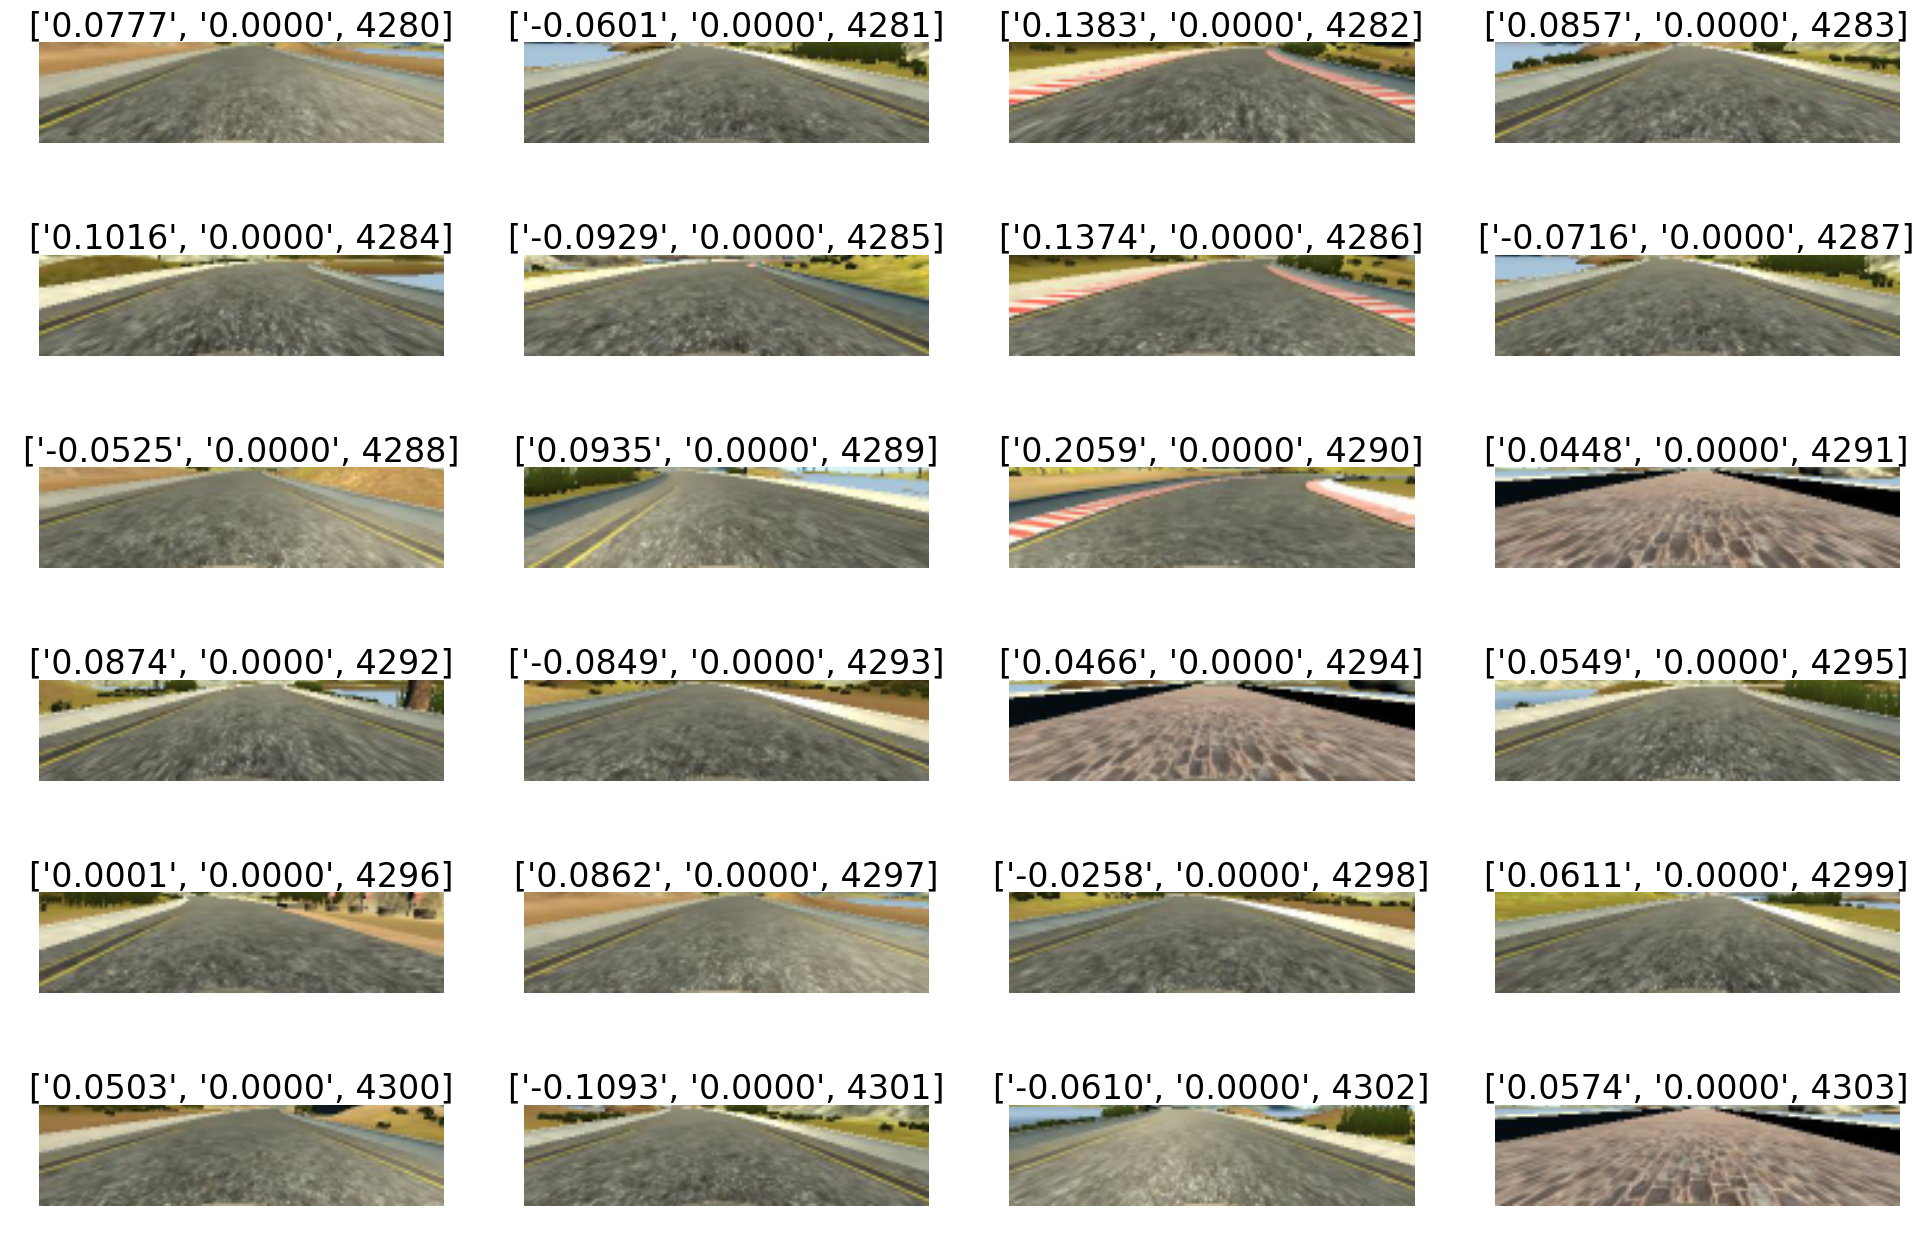

In [33]:
# test model on random sequence
%matplotlib inline
samples2Visualize = 24 # sample 10 random number
factors = [6,4] # indicate two factors for number of samples
assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
figure = plt.figure(figsize=(24,16))
idx = np.random.randint(len(drivingLog)-1-samples2Visualize)
for i in range(1,samples2Visualize+1):
    img = figure.add_subplot(factors[0],factors[1],i)
    # randomly sample an image from train set
    imgID = drivingLog['Center'][idx]
    image = loadImg(imgID, True) 
    if image.shape[2]<3:
        plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
    else:
        plt.imshow(image)
    newTestLabel = model.predict(image.reshape(1,40,160,image.shape[2]), batch_size=1, verbose=0)
    #newTestLabel = model.predict(image.reshape(1,128,128,image.shape[2]), batch_size=1, verbose=0)
    # in case of grayscale
    #plt.imshow(testFeatures[imgID].reshape(testFeatures[imgID].shape[0],testFeatures[imgID].shape[1]))
    #img.set_title(imgTitles[train['labels'][imgID]],fontsize=7)
    img.set_title([format(newTestLabel[0][0], '.4f'),format(drivingLog['Steering Angle'][idx], '.4f'),idx],fontsize=24)
    plt.axis('off')
    idx += 1
# great test case:  4520 6946  9497  5976 7463 4322 9336 9500 9600 9420
# udacity great test: 6097 2423 4521

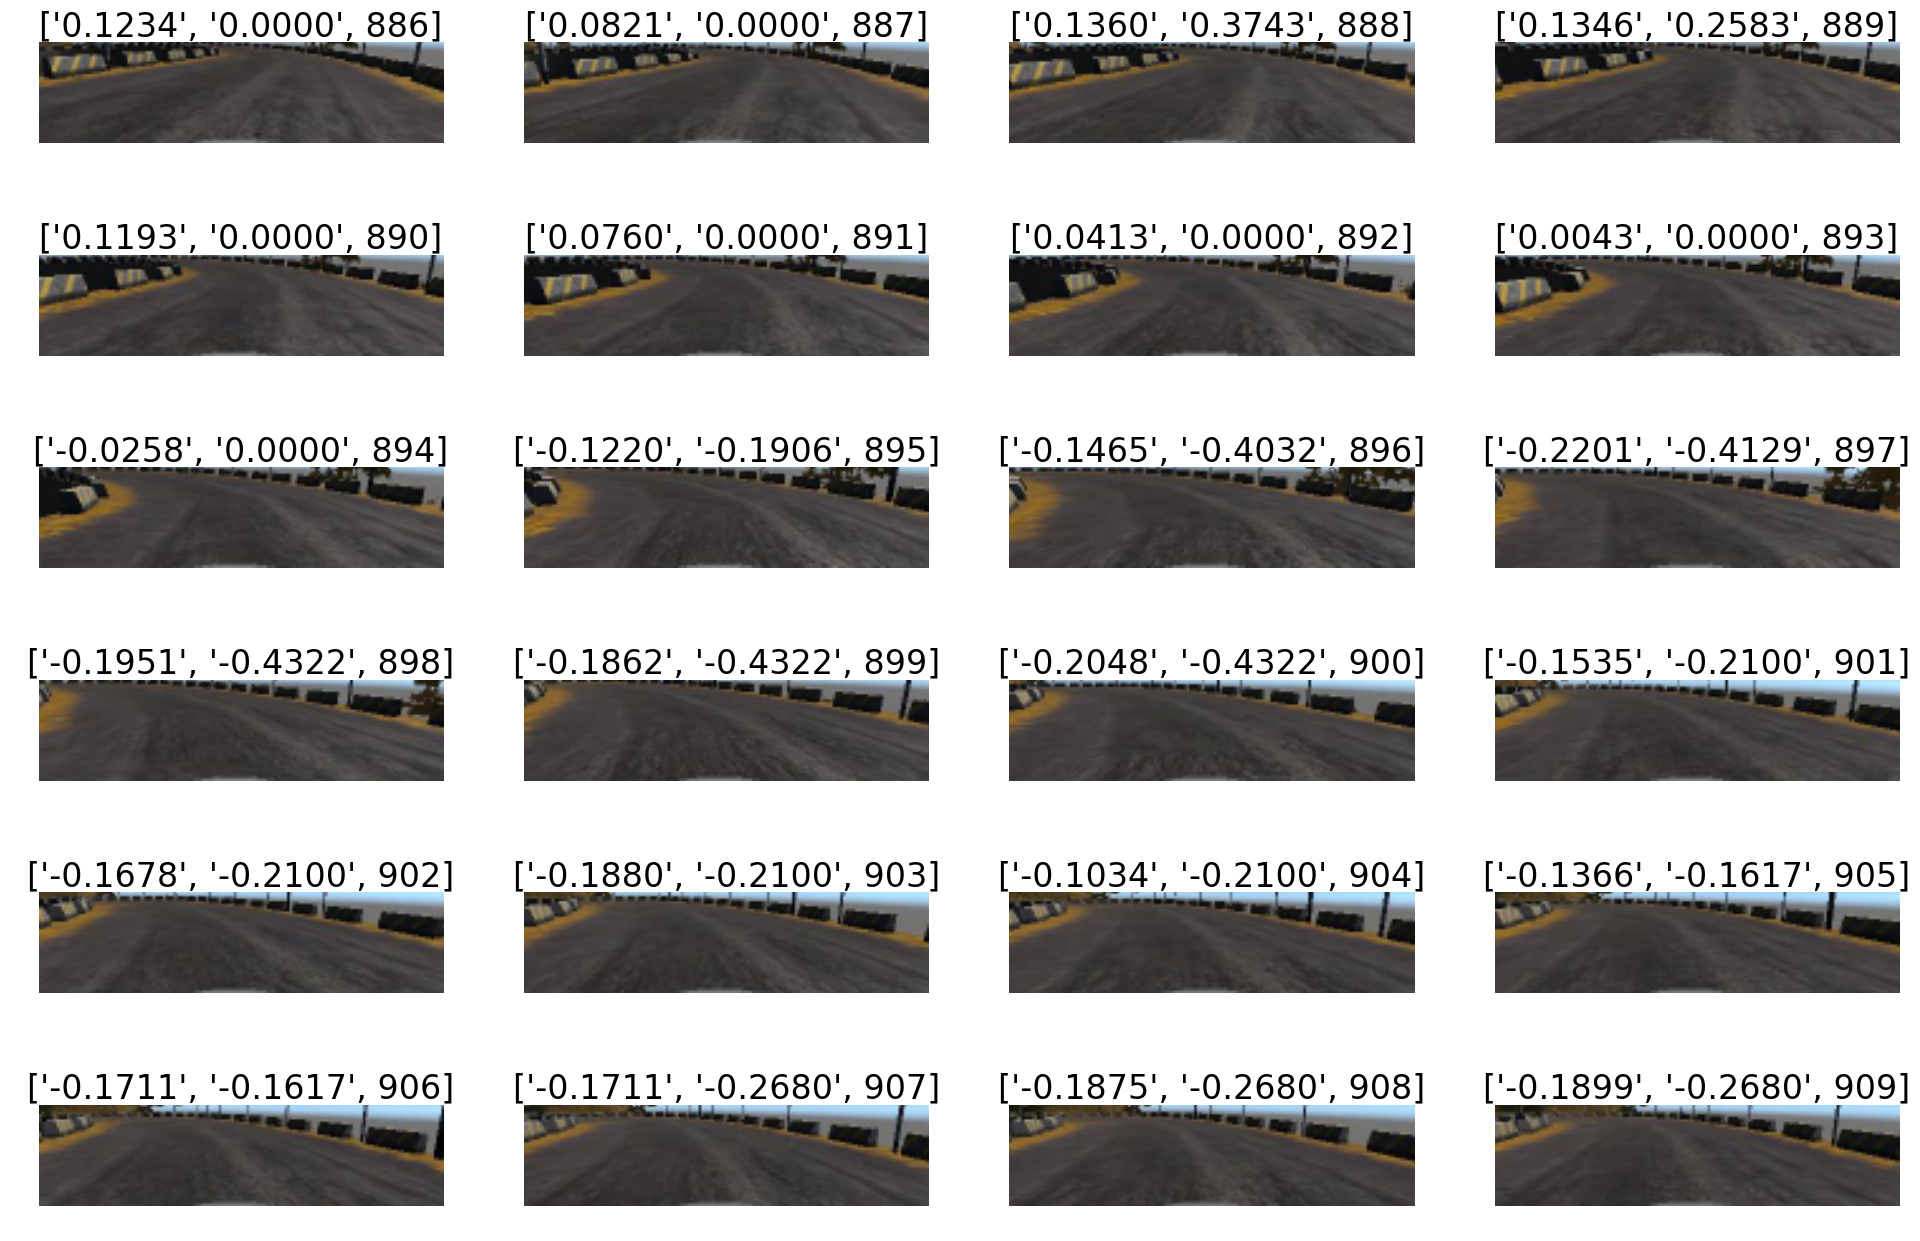

In [34]:
# test model on random sequence
%matplotlib inline
samples2Visualize = 24 # sample 10 random number
factors = [6,4] # indicate two factors for number of samples
assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
figure = plt.figure(figsize=(24,16))
idx = np.random.randint(len(drivingLogTest)-1-samples2Visualize)
for i in range(1,samples2Visualize+1):
    img = figure.add_subplot(factors[0],factors[1],i)
    # randomly sample an image from train set
    imgID = drivingLogTest['Center'][idx]
    image = loadImg(imgID, False) 
    if image.shape[2]<3:
        plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
    else:
        plt.imshow(image)
    newTestLabel = model.predict(image.reshape(1,40,160,image.shape[2]), batch_size=1, verbose=0)
    #newTestLabel = model.predict(image.reshape(1,128,128,image.shape[2]), batch_size=1, verbose=0)

    # in case of grayscale
    #plt.imshow(testFeatures[imgID].reshape(testFeatures[imgID].shape[0],testFeatures[imgID].shape[1]))
    #img.set_title(imgTitles[train['labels'][imgID]],fontsize=7)
    img.set_title([format(newTestLabel[0][0], '.4f'),format(drivingLogTest['Steering Angle'][idx], '.4f'),idx],fontsize=24)
    plt.axis('off')
    idx += 1
# great test case:  4520 6946  9497  5976 7463 4322 9336 9500 9600 9420
# udacity great test: 6097 2423 4521

In [35]:
# visualize model layers output
from keras import backend as K
layerOutput = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[2].output])
idx = 4000 # great test case:  4520 6946  9497  5976 7463 4322 9336 9500 9600 9420
test = drivingLog['Center'][idx]
testLabel = drivingLog['Steering Angle'][idx]
image = loadImg(test, True) 
# output in test mode = 0, train mode = 1
layerOutputSample = layerOutput([image.reshape(1,image.shape[0],image.shape[1],image.shape[2]), 1])[0]
layerOutputSample = layerOutputSample.reshape(layerOutputSample.shape[1],layerOutputSample.shape[2],layerOutputSample.shape[3])

(33, 153, 16)


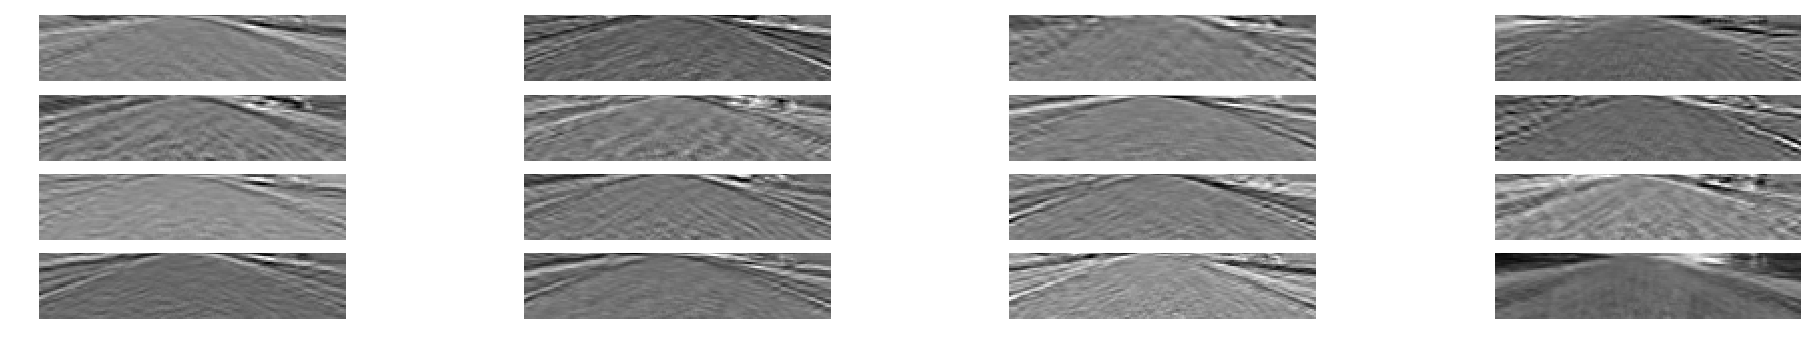

In [36]:
print(layerOutputSample.shape)
figure = plt.figure(figsize=(24,8))
factors = [8,4]
for ind in range(layerOutputSample.shape[2]):
    img = figure.add_subplot(factors[0],factors[1],ind + 1)
    #plt.subplot(4, 4, ind + 1)
    val = layerOutputSample[:,:,ind]
    plt.axis("off")
    plt.imshow(val, cmap='gray',interpolation='nearest')

In [37]:
# visualize model layers output
from keras import backend as K
layerOutput = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[3].output])
idx = 100 # 865  2500  13675 1500 7000 7100
test = drivingLog['Center'][idx]
testLabel = drivingLog['Steering Angle'][idx]
image = loadImg(test, True) 
# output in test mode = 0, train mode = 1
layerOutputSample = layerOutput([image.reshape(1,image.shape[0],image.shape[1],image.shape[2]), 1])[0]
layerOutputSample = layerOutputSample.reshape(layerOutputSample.shape[1],layerOutputSample.shape[2],layerOutputSample.shape[3])

(16, 76, 16)


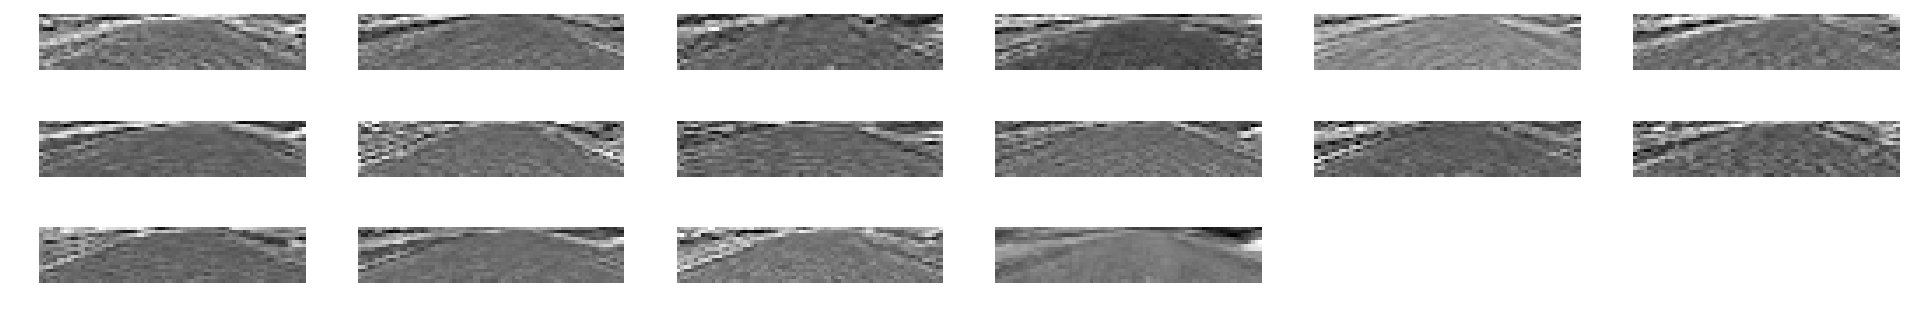

In [38]:
print(layerOutputSample.shape)
figure = plt.figure(figsize=(24,8))
factors = [6,6]
for ind in range(layerOutputSample.shape[2]):
    img = figure.add_subplot(factors[0],factors[1],ind + 1)
    #plt.subplot(4, 4, ind + 1)
    val = layerOutputSample[:,:,ind]
    plt.axis("off")
    plt.imshow(val, cmap='gray',interpolation='nearest')

In [39]:
# visualize model layers output
from keras import backend as K
layerOutput = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[7].output])
idx = 250 # 865  2500  13675 1500 7000 7100
test = drivingLogTest['Center'][idx]
testLabel = drivingLogTest['Steering Angle'][idx]
image = loadImg(test, False) 
# output in test mode = 0, train mode = 1
layerOutputSample = layerOutput([image.reshape(1,image.shape[0],image.shape[1],image.shape[2]), 0])[0]
layerOutputSample = layerOutputSample.reshape(layerOutputSample.shape[1],layerOutputSample.shape[2],layerOutputSample.shape[3])

(6, 36, 32)


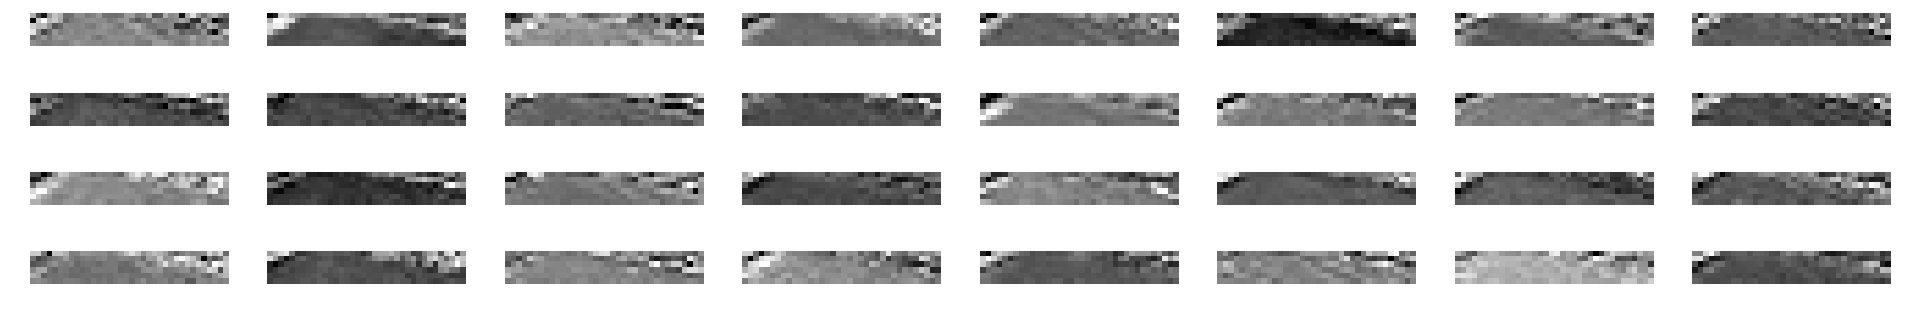

In [40]:
print(layerOutputSample.shape)
figure = plt.figure(figsize=(24,8))
factors = [8,8]
for ind in range(layerOutputSample.shape[2]):
    img = figure.add_subplot(factors[0],factors[1],ind + 1)
    #plt.subplot(4, 4, ind + 1)
    val = layerOutputSample[:,:,ind]
    plt.axis("off")
    plt.imshow(val, cmap='gray',interpolation='nearest')

In [41]:
print(model.layers[2].get_weights()[0].shape) # the weights

(8, 8, 3, 16)


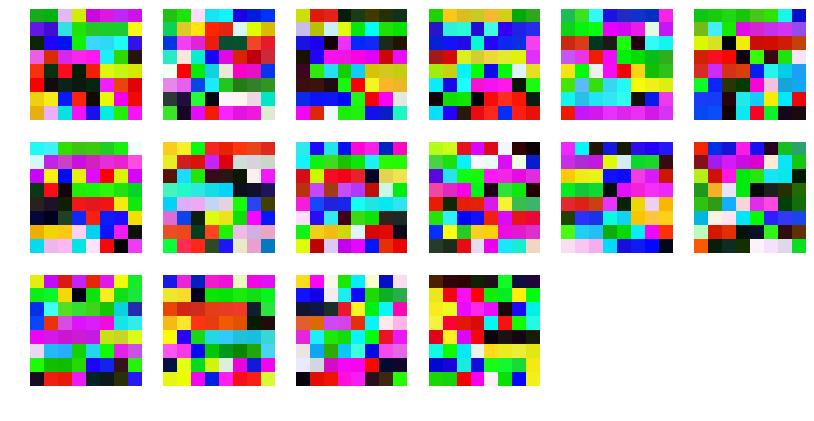

In [42]:
import pylab as pl
# source: http://euler.stat.yale.edu/~tba3/stat665/lectures/lec17/notebook17.html
weight = model.layers[2].get_weights()[0]
plt.figure(figsize=(10, 10), frameon=False)
for ind in range(weight.shape[3]):
    plt.subplot(6, 6, ind + 1)
    val = weight[:,:,:,ind]
    #print(val.shape)
    #im = val.reshape((3,3))
    plt.axis("off")
    plt.imshow(val,interpolation='nearest')

In [43]:
# save the model
import json
#import simplejson
jsonString = model.to_json() # json Model
with open('./model.json', 'w') as outFile:
    outFile.write(jsonString)
    # json.dump(jsonString, outFile)

model.save_weights('./model.h5') #  HDF5 file

In [ ]:
# load the model
from keras.models import model_from_json
jsonFile = './model.json'
with open(jsonFile, 'r') as jfile:
    #model = model_from_json(json.load(jfile))
    model = model_from_json(jfile.read())
model.compile("adam", "mse")
weights_file = jsonFile.replace('json', 'h5')
model.load_weights(weights_file)